In [ ]:
!wget https://www.epa.gov/system/files/other-files/2025-01/fuelproduction_dec2024.csv

--2025-03-14 20:43:48--  https://www.epa.gov/system/files/other-files/2025-01/fuelproduction_dec2024.csv
Resolving www.epa.gov (www.epa.gov)... 18.238.192.125, 18.238.192.65, 18.238.192.115, ...
Connecting to www.epa.gov (www.epa.gov)|18.238.192.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19323 (19K) [text/csv]
Saving to: ‘fuelproduction_dec2024.csv’

fuelproduction_dec2 100%[===================>]  18.87K  --.-KB/s    in 0s      

2025-03-14 20:43:49 (128 MB/s) - ‘fuelproduction_dec2024.csv’ saved [19323/19323]



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('fuelproduction_dec2024.csv')

print(df.columns)

Index(['RIN Year', 'Fuel', 'Fuel Code', 'Fuel Category', 'Fuel Category Code',
       'RIN Quantity', 'Batch Volume'],
      dtype='object')


In [ ]:
# # Ensure 'Year' is treated as an integer
df['RIN Year'] = df['RIN Year'].astype(int)

# # Aggregate production metrics by Year
df_yearly = df.groupby('RIN Year')[['RIN Quantity', 'Batch Volume']].sum().reset_index()

# # Display the aggregated DataFrame
print(df_yearly)

    RIN Year  RIN Quantity  Batch Volume
0       2010    7147975929    7024464213
1       2011   15535487739   14951683755
2       2012   15352270097   14753060919
3       2013   16649629221   15573860100
4       2014   17245997350   16154761117
5       2015   17931107377   16769028662
6       2016   19476196093   17898563403
7       2017   19354130885   17894840428
8       2018   19516152731   18057159728
9       2019   19812608290   18209664519
10      2020   18318256572   16608068795
11      2021   19936110698   18044519735
12      2022   21349989068   19051493317
13      2023   23846879744   20716771085
14      2024   25221496020   21641756583


In [ ]:
# Extract features (years) and target variables (RIN Quantity & Batch Volume)
X = df_yearly[['RIN Year']].values  # Independent variable (Years)
y_rin = df_yearly['RIN Quantity'].values  # Target: RIN Quantity
y_volume = df_yearly['Batch Volume'].values  # Target: Batch Volume

# Train Linear Regression Models
model_rin = LinearRegression().fit(X, y_rin)
model_volume = LinearRegression().fit(X, y_volume)

# Generate future years (2025-2030)
future_years = np.array(range(2025, 2031)).reshape(-1, 1)

# Predict future production
future_rin = model_rin.predict(future_years)
future_volume = model_volume.predict(future_years)

# Create a DataFrame for Forecasted Data
df_forecast = pd.DataFrame({
    'Year': future_years.flatten(),
    'RIN Quantity Forecast': future_rin,
    'Batch Volume Forecast': future_volume
})

# Display forecasted values
print(df_forecast)

   Year  RIN Quantity Forecast  Batch Volume Forecast
0  2025           2.491878e+10           2.182387e+10
1  2026           2.572784e+10           2.244061e+10
2  2027           2.653690e+10           2.305734e+10
3  2028           2.734596e+10           2.367408e+10
4  2029           2.815503e+10           2.429082e+10
5  2030           2.896409e+10           2.490755e+10


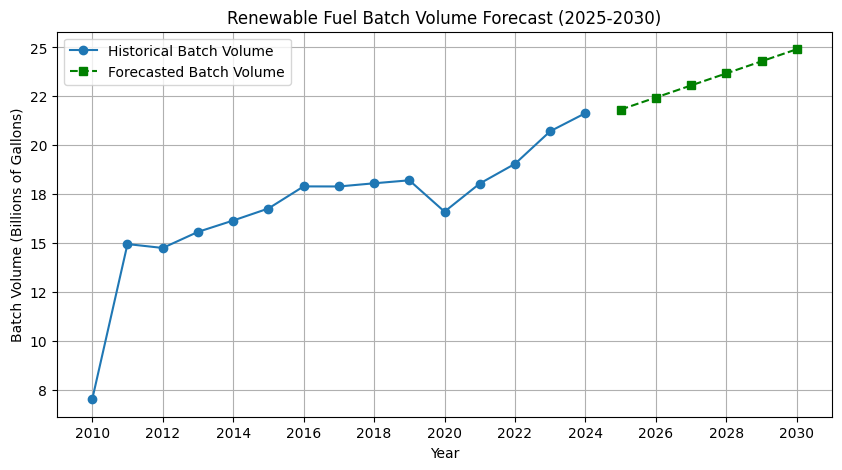

In [ ]:
# Scale Batch Volume to Billions
df_yearly['Batch Volume'] = df_yearly['Batch Volume'] / 1e9
df_forecast['Batch Volume Forecast'] = df_forecast['Batch Volume Forecast'] / 1e9

# Plot Historical Batch Volume
plt.figure(figsize=(10,5))
plt.plot(df_yearly['RIN Year'], df_yearly['Batch Volume'], marker='o', linestyle='-', label="Historical Batch Volume")

# Plot Forecasted Batch Volume (2025-2030)
plt.plot(df_forecast['Year'], df_forecast['Batch Volume Forecast'], marker='s', linestyle='--', color='green', label="Forecasted Batch Volume")

# Chart Labels & Title
plt.xlabel("Year")
plt.ylabel("Batch Volume (Billions of Gallons)")
plt.title("Renewable Fuel Batch Volume Forecast (2025-2030)")

# Fix x-axis ticks (show every 2 years)
plt.xticks(ticks=list(range(df_yearly['RIN Year'].min(), 2031, 2)))

# Ensure y-axis displays as whole numbers
plt.ticklabel_format(axis='y', style='plain')

# Add commas to y-axis values for readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

plt.legend()
plt.grid(True)

# Show the chart
plt.show()